In [17]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [19]:
#RTMLTON

#prep data
with open("rtmlton_nonoise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

nonoise =  [int(s) for s in content.split(',')]


'''

rt_comptimenonoise = [25839,25782,26932,2911,3112,3100,3123,3116,3106,3099,3103,3098,3098,3059,3121,3060,3106,3059,3102
                      ,3097,3101,3097,3098,3116,3104,3119,3090,3111,3058,3105,3062,3103,3063,3104,3102,3102,3109,3100
                      ,3120,3095,3100,3100,3103,3061,3100,3060,3120,3063,3100,3100,3104,4065,4056,4052,4078,4064,4055
                      ,4058,4053,4063,4070,4059,4060,4078,4063,4059,4058,4059,4062,4056,4079,4057,4060,4058,4066,4065
                      ,4059,4070,4080,4067,4057,4072,4056,4062,4052,4062,4057,4061,4060,4058,4086,4059,4066,4060,4088
                      ,4054,4067,4055,4062,4053,4062,4056,4055,4057,4064,4070,4067,4072,4060,4062,4082,4071,4058,4068
                      ,4062,4062,4060,4071,4056,4063,4062,4060,4070,4076,4164,4084,4078,4047,4070,4061,4080,4089,4092
                      ,4081,4091,4080,4079,4072,4081,4103,4091,4065,4070,4082,4062,4080,4086,4075,4056,4072,4068,4058
                      ,4059,4080,4070,4070,4091,4092,4097,4110,4122,4081,4110,4122,4097,4068,4130,4125,4091,4124,4125
                      ,4093,4084,4122,4115,4099,4080,4119,4083,4074,4119,4087,4120,4092,4097,4065,4056,4076,4071,4062
                      ,4085,4058,4065,4061,4066,4070,4065,4064,4080,4071]
'''

nonoise = [x/1000 for x in nonoise]


data2 = range(1,len(nonoise)+1,1)

data4 = [50 for x in data2]


#prep data
with open("rtmlton_noise.txt") as f2:
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

noise = [int(s) for s in content2.split(',')]


'''
noise = [41824,37085,36642,3359,3654,3337,3580,3606,5372,5735,4956,5931,6010,5571,5910,5668,5738,5435,5716
                    ,5611,5647,5689,5531,4976,4772,5125,5068,5006,4968,5028,3460,5061,5395,5784,5700,6658,5552,5450
                    ,5788,5603,5571,5636,5440,5476,4920,4897,5009,4988,5104,4941,4952,6286,4870,6695,7319,7916,7644
                    ,7872,7625,7971,7635,7664,7905,7790,7813,7809,7727,7741,7029,7034,6899,6910,7196,7020,7031,4814
                    ,6569,7593,7963,7820,7850,7845,7604,7934,7441,7879,7550,9276,7717,7534,7834,7736,7600,7833,8099
                    ,7940,7819,7777,7997,6634,7894,7535,7841,7855,7803,7940,7832,7879,7798,7968,7484,7567,6668,9107
                    ,7652,7641,7871,7662,7296,6831,6419,6576,7794,7712,7850,8254,7973,7842,7825,7816,7774,6991,7206
                    ,6985,7013,6979,6860,7265,4880,7472,6818,6599,6937,7140,7495,7540,8039,7611,7815,7893,7873,7513
                    ,7513,7660,7608,7524,7700,7705,7025,7117,7201,6832,9197,6860,7726,8015,7881,7988,7932,8026,8267
                    ,7898,7343,7628,7929,7973,7912,7673,7822,7836,7904,7132,7070,7020,6772,7799,7895,8004,7669,7891
                    ,7488,7872,7133,7443,7966,7850,7703,7793,7023,6929]
                    
'''

noise = [x/1000 for x in noise]

#noise = noise[:100]
#nonoise=nonoise[:100]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=120,)



plt.xlim(0,len(noise)+5)

plt.ylabel("Computation time ($ms$)",fontsize=18)
plt.xlabel("Release count",fontsize=18)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

# Legend creation
hB, = plt.plot([1,1],'o',color='b',fillstyle ='none')
hR, = plt.plot([1,1],'o',color='g',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')
plt.legend((hB, hR,hL),('RTMLton', 'RTMLton with noise','Deadline'),prop = fontP,loc=1,ncol=3,mode="expand",bbox_to_anchor=(0., 1.03, 1., .1))
hB.set_visible(False)
hR.set_visible(False)


plt.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none',markersize='8')
plt.plot(data2,data4,'r--')
plt.tick_params(labelsize=10)


#plt.plot(testd1,testnonoise,'bo',testd1,testnoise,'go',fillstyle='none')
#plt.plot(testd1,testd2,'r--',alpha=0.5)

pp = PdfPages("{}.pdf".format("cd_rtmlton"))
pp.savefig(fig)
pp.close()


plt.show()

IndexError: list index out of range

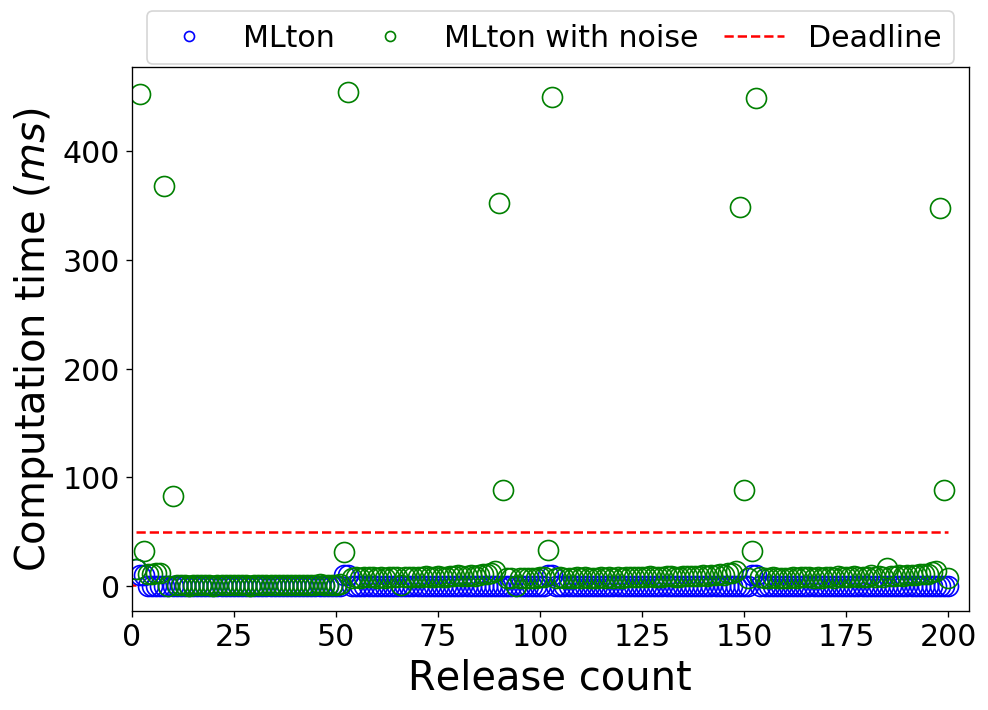

In [362]:
#MLTon

#prep data
with open("mlton_noise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

noise =  [int(s) for s in content.split(',')]

noise=[x/1000 for x in noise][:200]

#prep data
with open("mlton_nonoise.txt") as f:
    content2 = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

nonoise =  [int(s) for s in content2.split(',')]

nonoise = [x/1000 for x in nonoise][:200]


data2 = range(1,len(noise)+1,1)

data4 = [50 for x in data2]

'''
rtnonoise = [11299,10782,11073,256,221,217,217,224,223,252,214,215,216,211,255,216,213,241,214,259,214,214,212,223,220
             ,217,219,219,216,219,217,217,227,217,218,218,217,219,227,214,211,213,214,230,213,213,210,212,213,212,247
             ,375,375,392,413,385,383,385,383,384,394,384,384,384,389,375,374,373,374,374,373,381,375,373,375,375,375
             ,392,411,391,393,414,384,384,382,384,384,382,384,525,415,424,387,383,387,389,385,387,385,382,387,395,386
             ,387,399,392,403,403,400,402,401,408,401,401,427,393,426,383,386,385,383,393,381,387,390,389,428,389,385
             ,388,387,397,392,390,391,392,411,392,411,394,391,398,392,391,390,393,391,393,390,393,393,406,400,398,397
             ,397,395,397,399,397,398,407,419,389,389,386,389,543,413,391,390,420,400,406,402,406,407,402,402,414,402
             ,395,392,395,399,394,399,399,394,388,401,396,394,386,401,408,403,405,409,405]

rtnonoise = [x/1000 for x in rtnonoise]


rtnoise = [19319,383462,13092,213,195,306943,214,215,235,240,248,217,196,209,214,208,200,207,213,240,230,208,216,401,12609,383303,878,367618,213,208,214,217,225,216,222,212,201,211,200,191,199,207,216,210,202,217,1003,376909,13044,201,222,366772,215,209,213,216,196,209,216,210,216,208,258,231,195,210,214,209,216,372,12249,376356,842,225,223,375926,214,210,214,196,221,209,211,205,221,231,200,210,207,196,214,209,1008,310626,13752,230,264,241,215,374009,215,304244,219,368559,232,302085,222,301260,244,301801,213,367337,217,302198,196,366544,12264,12019,827,215,217,366665,215,302961,197,302266,215,302426,234,301845,213,367203,215,301503,226,301588,214,367087,1015,375999,12923,196,214,213,218,222,226,367470,215,301654,214,301626,215,301595,215,303568,214,305019,219,366682,215,367332,12234,11824,840,194,213,214,196,216,205,301596,214,301820,215,302172,215,366825,214,302697,221,301631,215,367777,998,377297,13010,213,226,215,212,214,214,221,234,194,214,214,215,368164]

rtnoise = [x/1000 for x in rtnoise]
'''


test = [447893,4300,4964,5846,8369,13727,446849,10389,10684,12240,12854,14104,17452,455254,10396,10533,13060,12716,13799,18888,456554,10426,10598,11567,12410,14978,18756,435002,10498,12139,12308,13213,16782,22303,431890,10486,11470,12904,13485,17062,444333,10498,11589,12245,13190,25449,435027,10398,11965,12901,13949,18468,439385,10615,12216,12165,13897,16454,444261,10428,11921,13881,14144,18043,440684,10421,12012,12954,13876,18539,439757,10715,12115,13401,14553,21722,433364,11148,11911,13620,15249,21875,434836,11234,11864,14295,16050,444986,11459,11835,18127,17937,443347,11292,11870,14240,15953,444730,11419,11848,13701,15882,26245,431966,11201,13438,14809,19443,438593,11341,12521,14183,17275,441659,11309,12595,14192,17426,443366,11260,13140,14453,11813,442557,11999,12605,15108,18740,439649,11984,12499,16345,25267,434080,12029,21286,444471,11217,13254,15022,18623,441140,11964,13192,16319,444479,12265,13248,15119,22464,438847,11985,13873,17178,444411,12058,13317,16322,26681,432685,12736,13905,18191,446258,12040,14034,17003,444154,11937,13847,18199,443362,12752,13943,18183,446504,12878,13972,11381,443712,18397,18498,444705,12848,15718,24329,435788,13349,16917,451709,12700,14822,21890,437332,13358,16218,27743,436209,14141,18389]

test=[x/1000 for x in test]

# Create a figure instance
fig = plt.figure(1, figsize=(9,6),dpi=120,)



plt.xlim(0,len(noise)+5)

rc = dict(markerfacecolor='#e7298a', marker='o',alpha=0.5)
plt.ylabel("Computation time ($ms$)",fontsize=24)
plt.xlabel("Release count",fontsize=24)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('18')

# Legend creation
hB, = plt.plot([1,1],'o',color='b',fillstyle ='none')
hR, = plt.plot([1,1],'o',color='g',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')
plt.legend((hB, hR,hL),('MLton', 'MLton with noise','Deadline'),prop = fontP,loc=1,ncol=3,mode="expand",bbox_to_anchor=(0., 1.03, 1., .1))
hB.set_visible(False)
hR.set_visible(False)


plt.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none',markersize='12')
plt.plot(data2,data4,'r--')

plt.tick_params(labelsize=18)


pp = PdfPages("{}.pdf".format("cd_mlton"))
pp.savefig(fig)
pp.close()


plt.show()

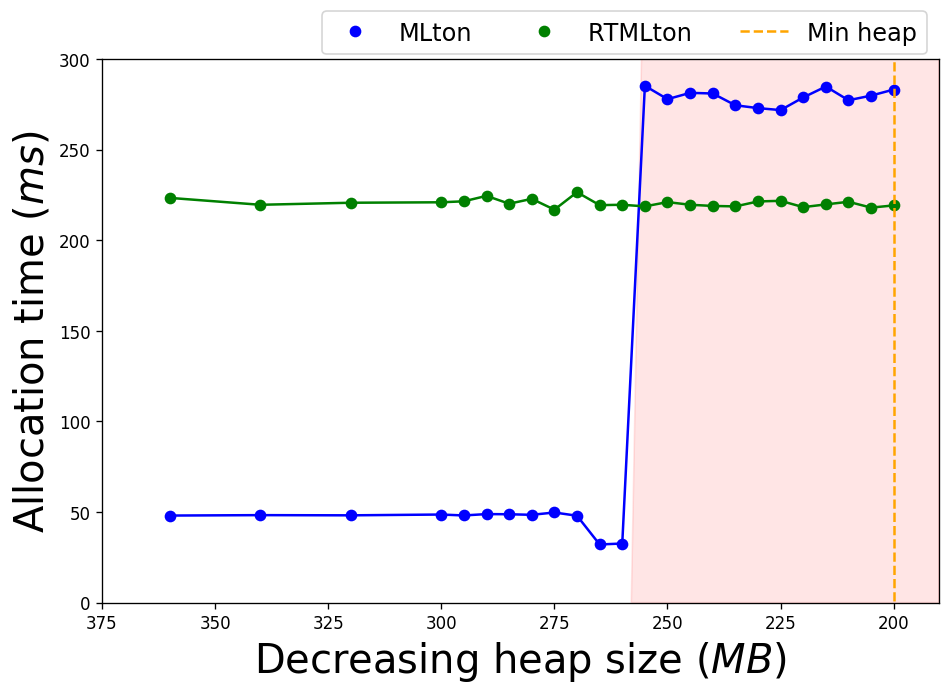

In [251]:
#prep data



rtmlton =[219231,218015,221240,219787,218283,221766,221430,218689,218943,219592,221064,
          218703,219597,219387,226533,216887,222856,220163,224505,221505,220961,
          220710,219583,223385]

mlton =[283179,279830,277272,284845,278820,271838,272932,274501,281006,281350,277875,285248,32651,32110,47980,49761,
        48484,48789,48892,48127,48641,48200,48307,48075]

heap =[200,205,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300,320,340,360]


rtmlton = [x/1000 for x in rtmlton]
mlton =[x/1000 for x in mlton]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=120,)


plt.xlim(375, 190)
plt.ylim(0,300)

rc = dict(markerfacecolor='#e7298a', marker='o',alpha=0.5)
plt.ylabel("Allocation time ($ms$)",fontsize=24)
plt.xlabel("Decreasing heap size ($MB$)",fontsize=24)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('x-large')

# Legend creation
hB, = plt.plot([1,1],'o',color='b')
hR, = plt.plot([1,1],'o',color='g')
hL, = plt.plot([1,1],'--',color='orange')
plt.legend((hB, hR,hL),('MLton', 'RTMLton','Min heap'),prop = fontP,loc=1,ncol=3,bbox_to_anchor=(0., 1.01, 1., .1))
hB.set_visible(False)
hR.set_visible(False)

y = [0, 400]
x1 = [258,  255]
x2 = [190,  190]

plt.fill_betweenx(y, x1, x2,alpha=0.1,color ='r')

plt.plot(heap,mlton,'bo-',heap,rtmlton,'go-')
plt.plot([200 for x in range(1,300)],range(1,300),'--',color='orange')

#plt.plot(testd1,testnonoise,'bo',testd1,testnoise,'go',fillstyle='none')
#plt.plot(testd1,testd2,'r--',alpha=0.5)

pp = PdfPages("{}.pdf".format("fragtol"))
pp.savefig(fig)
pp.close()


plt.show()

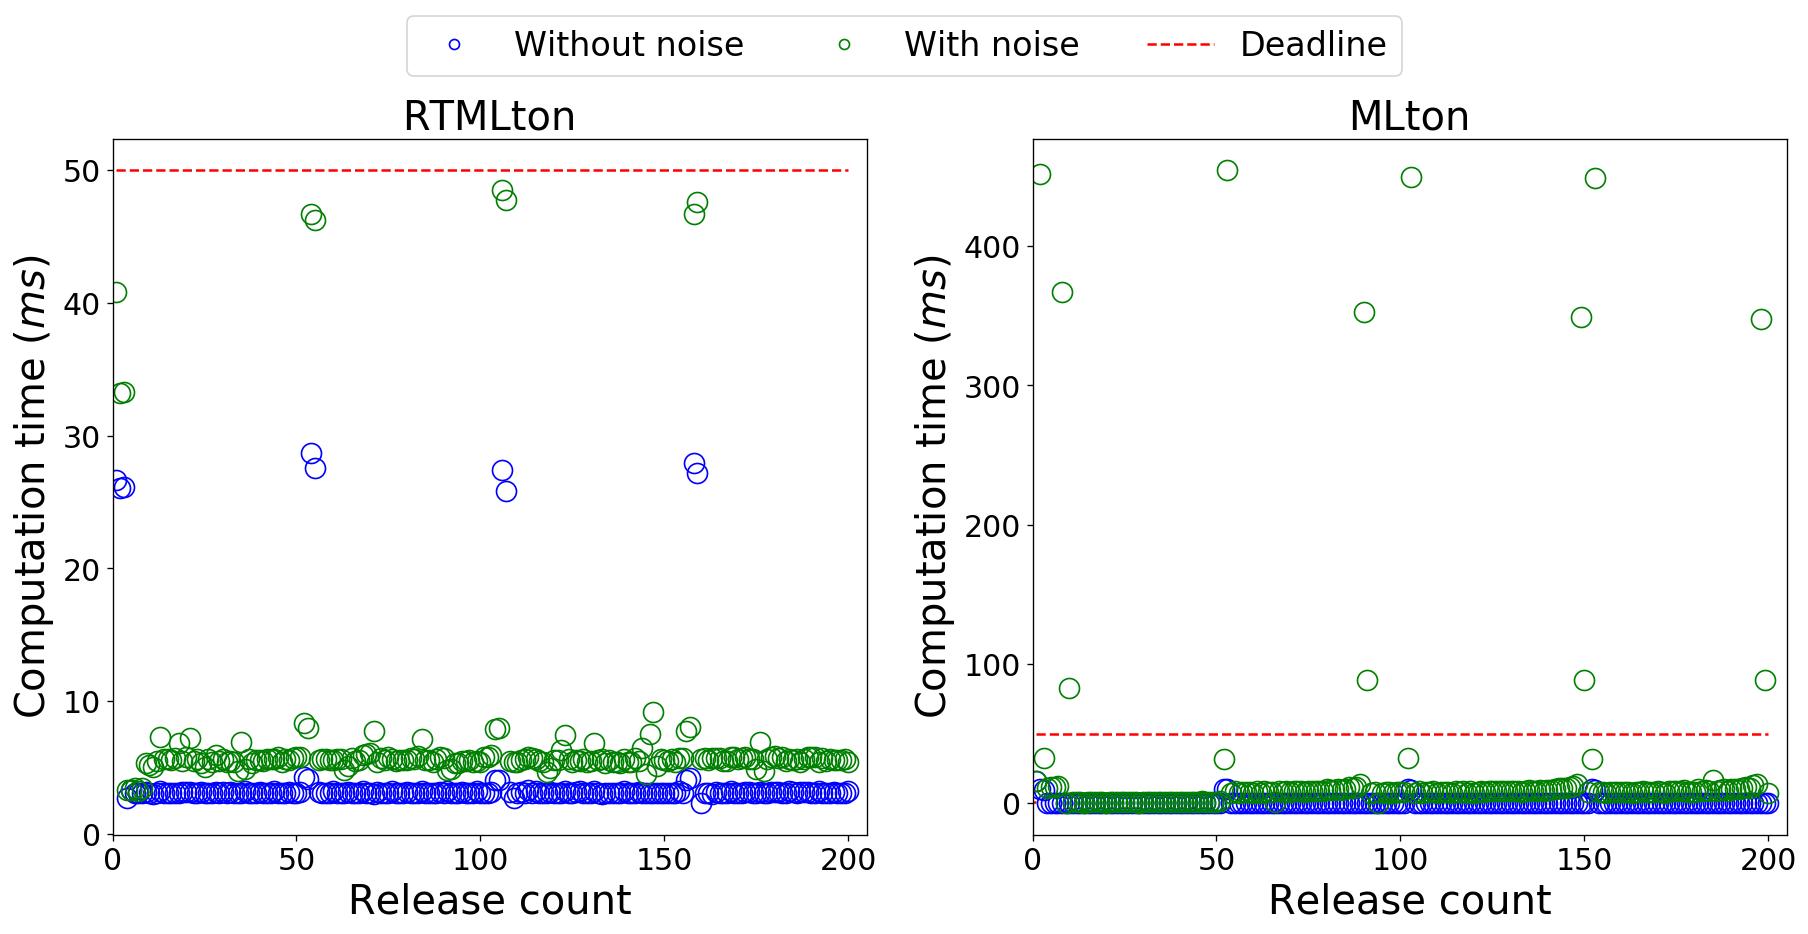

In [367]:
#RTMLTON

#prep data
with open("rtmlton_nonoise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

nonoise =  [int(s) for s in content.split(',')]


nonoise = [x/1000 for x in nonoise][:200]


data2 = range(1,len(nonoise)+1,1)

data4 = [50 for x in data2]


#prep data
with open("rtmlton_noise.txt") as f2:
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

noise = [int(s) for s in content2.split(',')][:200]


noise = [x/1000 for x in noise]



# Create a figure instance
fig, (ax, ax1) = plt.subplots(1, 2, sharex=True,figsize=(18, 8),dpi=120,)


ax.set_xlim(0,len(noise)+5)

ax.set_ylabel("Computation time ($ms$)",fontsize=24)
ax.set_xlabel("Release count",fontsize=24)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')




ax.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none',markersize='12')
ax.plot(data2,data4,'r--')



#MLton
#prep data
with open("mlton_noise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

noise =  [int(s) for s in content.split(',')]

noise=[x/1000 for x in noise][:200]

#prep data
with open("mlton_nonoise.txt") as f:
    content2 = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

nonoise =  [int(s) for s in content2.split(',')]

nonoise = [x/1000 for x in nonoise][:200]


data2 = range(1,len(noise)+1,1)

data4 = [50 for x in data2]

ax1.set_xlim(0,len(noise)+5)

ax1.set_ylabel("Computation time ($ms$)",fontsize=24)
ax1.set_xlabel("Release count",fontsize=24)



# Legend creation
hB, = plt.plot([1,1],'o',color='b',fillstyle ='none')
hR, = plt.plot([1,1],'o',color='g',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')

plt.figlegend( (hB, hR,hL), ('Without noise', 'With noise','Deadline'),fontsize='20', loc = 'upper center', ncol=3,
            )

hB.set_visible(False)
hR.set_visible(False)


ax1.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none',markersize='12')
ax1.plot(data2,data4,'r--')


ax.set_title("RTMLton",fontsize='24')
ax1.set_title("MLton",fontsize='24')

plt.subplots_adjust(wspace=0.22, top=0.85)

ax.tick_params(labelsize=18)
ax1.tick_params(labelsize=18)




pp = PdfPages("{}.pdf".format("cd_mlton_rtmlton"))
pp.savefig(fig)
pp.close()

plt.show()